# 👩🏻‍💻 머신러닝의이해 과제 #2
- 2024.06.17(월) 23:59까지
- 제출 파일 형식 : ipynb
---
# 🍷 와인 데이터 실습에 딥러닝 적용해보기
- 첨부된 wine.csv 파일 활용 (readcsv 함수로 해당 데이터를 load할 때 "sep=," 옵션을 적용할 것)
- 기본적인 딥러닝 코드는 14주차 실습 부분을 참고할 것
- 코드가 완전하지 않더라도 기간 내에 제출만 하면 감점 없음
---

In [1]:
# 데이터 불러오기
import numpy as np
import pandas as pd
import tensorflow as tf

wine_dataset = pd.read_csv('wine.csv', sep=',')
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
# 데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    wine_dataset.iloc[:, :-1], wine_dataset.iloc[:, -1],
    test_size=0.2, random_state=42)

In [3]:
# 학습 데이터, 테스트 데이터, 개별 훈련 데이터 형태 확인
print("훈련용 데이터 형태:", x_train.shape)
print("훈련용 데이터 레이블 형태:",x_test.shape)
print("테스트용 데이터 형태:", y_train.shape)
print("테스트용 데이터 레이블 형태:", y_test.shape)

훈련용 데이터 형태: (5197, 12)
훈련용 데이터 레이블 형태: (1300, 12)
테스트용 데이터 형태: (5197,)
테스트용 데이터 레이블 형태: (1300,)


In [4]:
# 순차 모델 생성
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(12,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(3, activation='softmax'),
])

In [5]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=2)

Epoch 1/30
1040/1040 - 2s - loss: 0.3726 - accuracy: 0.9192 - 2s/epoch - 2ms/step
Epoch 2/30
1040/1040 - 1s - loss: 0.1400 - accuracy: 0.9517 - 1s/epoch - 1ms/step
Epoch 3/30
1040/1040 - 1s - loss: 0.1208 - accuracy: 0.9594 - 1s/epoch - 1ms/step
Epoch 4/30
1040/1040 - 2s - loss: 0.1116 - accuracy: 0.9634 - 2s/epoch - 2ms/step
Epoch 5/30
1040/1040 - 2s - loss: 0.1013 - accuracy: 0.9654 - 2s/epoch - 2ms/step
Epoch 6/30
1040/1040 - 1s - loss: 0.0889 - accuracy: 0.9694 - 1s/epoch - 1ms/step
Epoch 7/30
1040/1040 - 1s - loss: 0.0900 - accuracy: 0.9708 - 1s/epoch - 1ms/step
Epoch 8/30
1040/1040 - 1s - loss: 0.0915 - accuracy: 0.9696 - 1s/epoch - 1ms/step
Epoch 9/30
1040/1040 - 1s - loss: 0.0819 - accuracy: 0.9731 - 1s/epoch - 1ms/step
Epoch 10/30
1040/1040 - 1s - loss: 0.0835 - accuracy: 0.9736 - 1s/epoch - 1ms/step
Epoch 11/30
1040/1040 - 1s - loss: 0.0746 - accuracy: 0.9761 - 1s/epoch - 1ms/step
Epoch 12/30
1040/1040 - 1s - loss: 0.0763 - accuracy: 0.9761 - 1s/epoch - 1ms/step
Epoch 13/30
1

In [6]:
# 신경망 학습 결과
print("신경망 모델의 학습 결과:")
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print("와인 데이터의 분류 정확도:", eval_acc)

신경망 모델의 학습 결과:
41/41 [==============================] - 0s 2ms/step - loss: 0.1012 - accuracy: 0.9746
와인 데이터의 분류 정확도: 0.9746153950691223


In [7]:
# 성능 향상을 위해 레이어 추가
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(12,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(30, activation='relu'), # 새롭게 추가한 층
    keras.layers.Dense(3, activation='softmax'),
])

In [10]:
# 모델2 컴파일
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model2.fit(x_train, y_train, epochs=30, batch_size=5, verbose=0)

In [11]:
# 신경망 학습 결과 (레이어 추가 후)
print("신경망 모델의 학습 결과 (레이어 추가 후):")
eval_loss, eval_acc = model2.evaluate(x_test, y_test)
print("와인 데이터의 분류 정확도 (레이어 추가 후):", eval_acc)

신경망 모델의 학습 결과 (레이어 추가 후):
41/41 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9815
와인 데이터의 분류 정확도 (레이어 추가 후): 0.9815384745597839


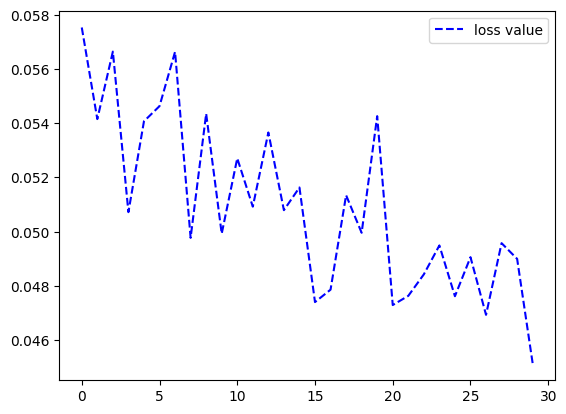

In [15]:
# 학습 과정에 따른 손실 함수 변화 출력
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], 'b--', label='loss value')
plt.legend()
plt.show()

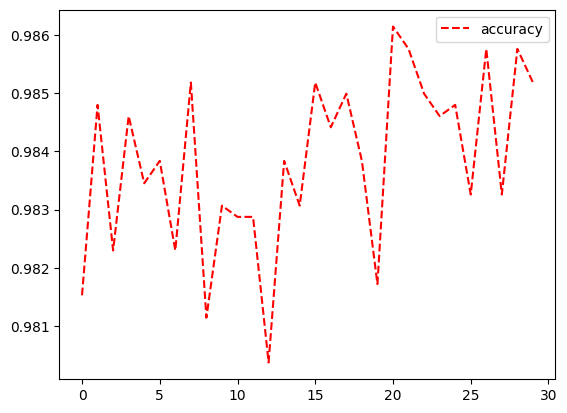

In [16]:
# 학습 과정에 따른 정확도 변화 출력
plt.plot(hist.history['accuracy'], 'r--', label='accuracy')
plt.legend()
plt.show()

In [17]:
# 학습시킨 모델 .h5 파일로 저장 : save()
model2.save('wine_60x30_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# 저장된 모델 확인
loaded = keras.models.load_model('wine_60x30_model.h5')
loaded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 60)                780       
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                                 
 dense_4 (Dense)             (None, 3)                 93        
                                                                 
Total params: 2703 (10.56 KB)
Trainable params: 2703 (10.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
